<a href="https://www.kaggle.com/code/shubhamgupta012/google-stocks-data-anomaly-detection?scriptVersionId=133053591" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-stock-data/Google Dataset.xlsx


In [2]:
df = pd.read_excel('/kaggle/input/google-stock-data/Google Dataset.xlsx')
df.head()

,Month Starting,Open,High,Low,Close,Change %,Avg. Volume
0,"Dec. 01, 2022",101.38,102.59,100.67,101.28,-0.0017,21771536
1,"Nov. 01, 2022",95.59,101.45,83.45,101.45,0.0717,28294944
2,"Oct. 03, 2022",97.22,105.10,91.90,94.66,-0.0155,27843110
3,"Sep. 01, 2022",109.20,112.64,96.03,96.15,-0.1191,25381194
4,"Aug. 01, 2022",115.53,123.26,108.80,109.15,-0.0642,18737451


In [3]:
df.shape


(106, 7)

In [4]:
df.isnull().sum()

Month Starting    0
Open              0
High              0
Low               0
Close             0
Change %          0
Avg. Volume       0
dtype: int64

In [5]:
print(df['Month Starting'][31])
print(df['Month Starting'][43])
print(df['Month Starting'][55])

May. 01,2020
May. 01,2019
May. 01,2018


In [6]:
df[df['Change %'] == 0]

,Month Starting,Open,High,Low,Close,Change %,Avg. Volume
100,"Aug. 01, 2014",28.52,29.37,28.00,28.58,0.0,26313579
105,"Mar. 27, 2014",28.40,28.40,27.65,27.85,0.0,432192


In [7]:
df['Month Starting'] = pd.to_datetime(df['Month Starting'],errors='coerce').dt.date
df

,Month Starting,Open,High,Low,Close,Change %,Avg. Volume
0,2022-12-01,101.38,102.59,100.67,101.28,-0.0017,21771536
1,2022-11-01,95.59,101.45,83.45,101.45,0.0717,28294944
2,2022-10-03,97.22,105.10,91.90,94.66,-0.0155,27843110
3,2022-09-01,109.20,112.64,96.03,96.15,-0.1191,25381194
4,2022-08-01,115.53,123.26,108.80,109.15,-0.0642,18737451
...,...,...,...,...,...,...,...
101,2014-07-01,28.92,29.98,28.25,28.58,-0.0064,31411358
102,2014-06-02,28.03,29.12,26.94,28.76,0.0275,36121936
103,2014-05-01,26.35,28.39,25.16,27.99,0.0631,34808252
104,2014-04-01,27.93,30.24,25.14,26.33,-0.0544,64037909


In [8]:
df.isnull().sum()

Month Starting    3
Open              0
High              0
Low               0
Close             0
Change %          0
Avg. Volume       0
dtype: int64

In [9]:
df[df['Month Starting'].isnull() == True]

,Month Starting,Open,High,Low,Close,Change %,Avg. Volume
31,NaT,66.43,72.05,64.95,71.45,0.0595,31890974
43,NaT,59.40,59.54,55.01,55.18,-0.0714,30294330
55,NaT,50.68,55.54,50.31,54.25,0.0665,28953815


In [10]:
df['Month Starting'][31] = pd.to_datetime('2020-05-01')
df['Month Starting'][43] = pd.to_datetime('2019-05-01')
df['Month Starting'][55] = pd.to_datetime('2018-05-01')

/tmp/ipykernel_20/1758633316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month Starting'][31] = pd.to_datetime('2020-05-01')
/tmp/ipykernel_20/1758633316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month Starting'][43] = pd.to_datetime('2019-05-01')
/tmp/ipykernel_20/1758633316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month Starting'][55] = pd.to_datetime('2018-05-01')


In [11]:
df.isnull().sum()

Month Starting    0
Open              0
High              0
Low               0
Close             0
Change %          0
Avg. Volume       0
dtype: int64

Text(0.5, 1.0, 'Opening and Closing price of Stock')

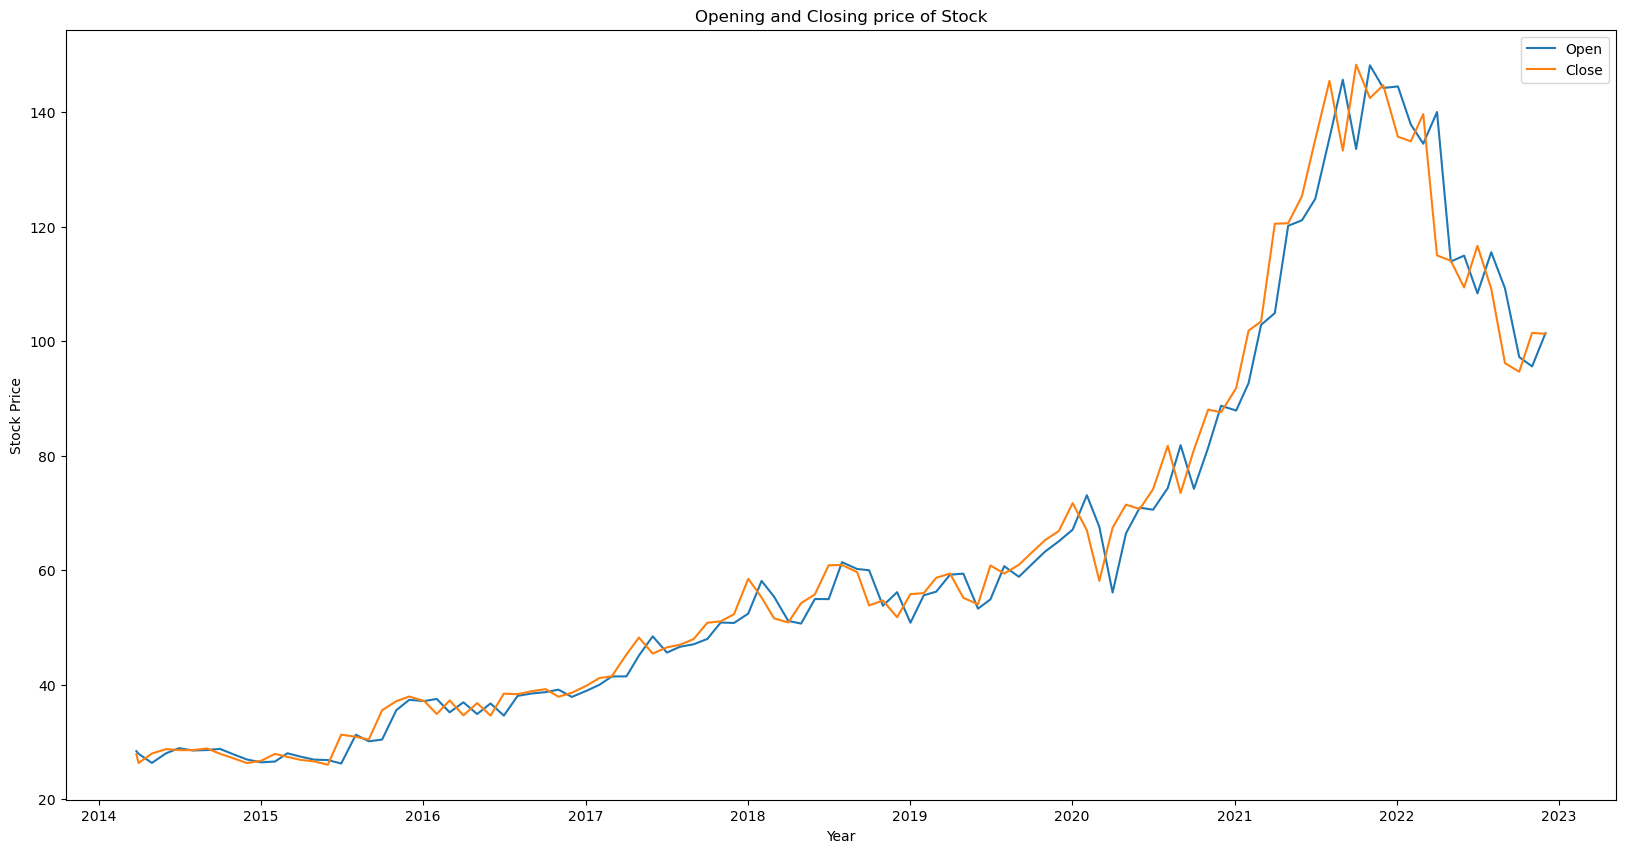

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(df['Month Starting'],df['Open'],label='Open')
plt.plot(df['Month Starting'],df['Close'],label='Close')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Opening and Closing price of Stock')

Text(0.5, 1.0, 'High and Low price of Stock Price of Google')

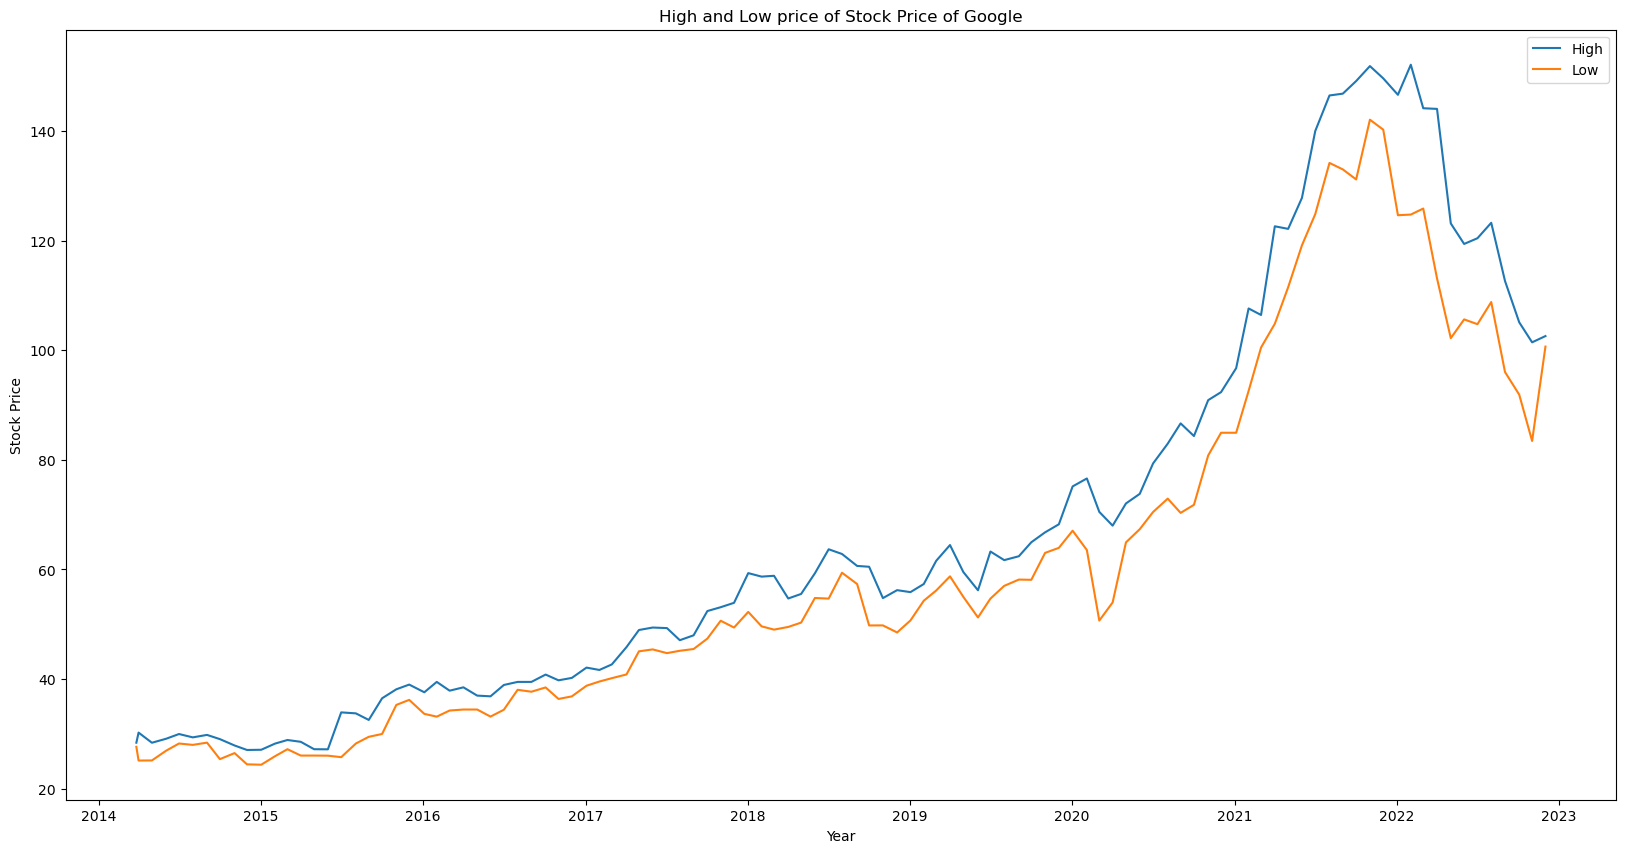

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(df['Month Starting'],df['High'],label='High')
plt.plot(df['Month Starting'],df['Low'],label='Low')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.legend()
plt.title('High and Low price of Stock Price of Google')

Text(0.5, 1.0, 'High and Opening price of Stock Price of Google')

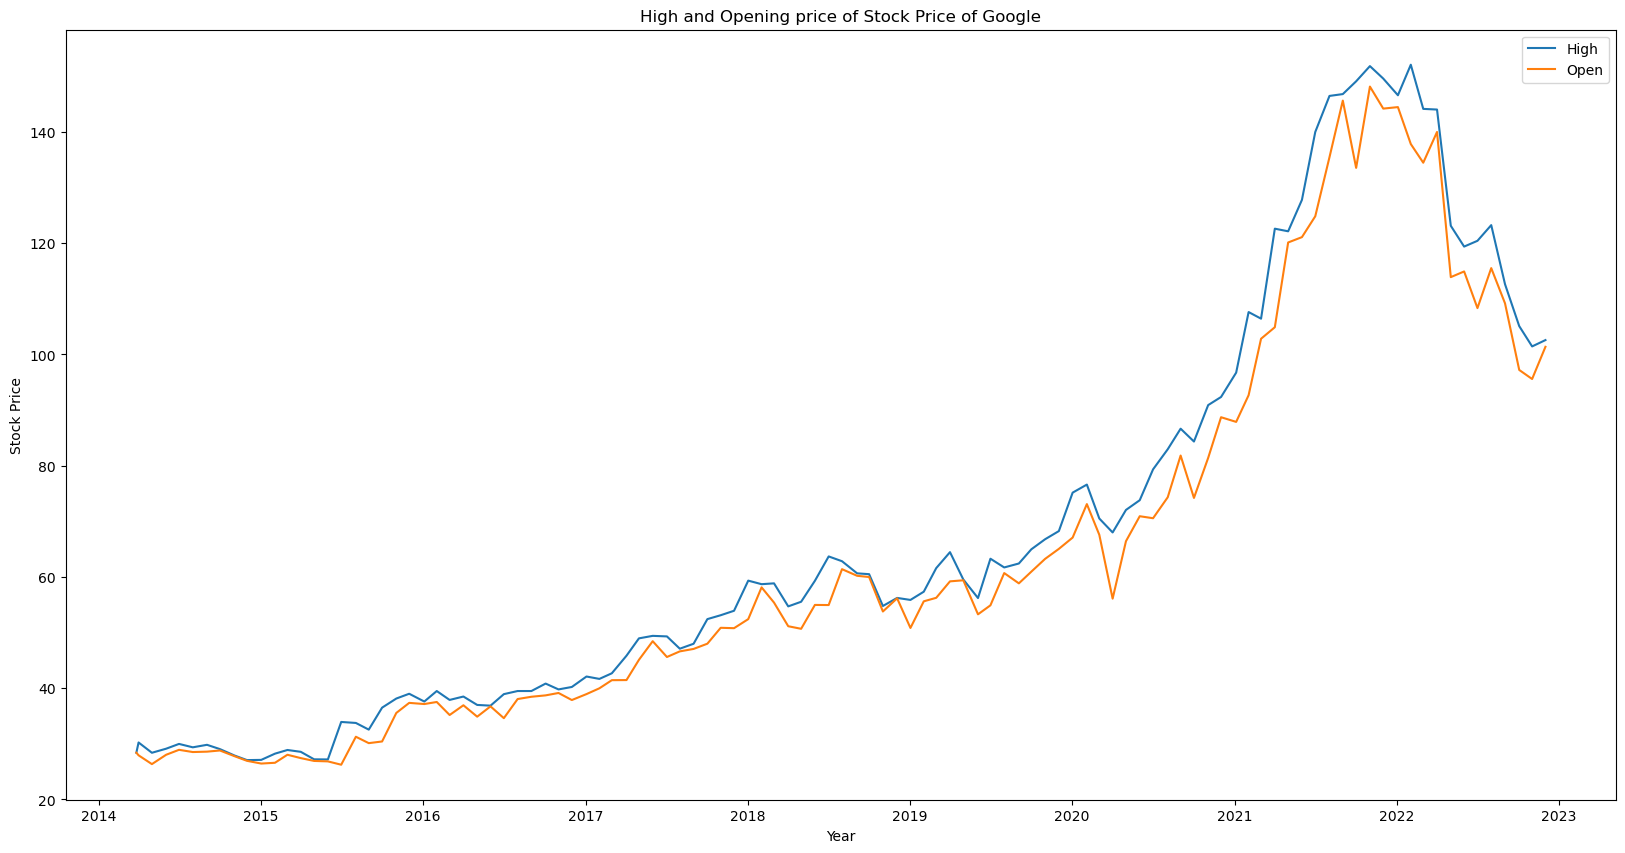

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(df['Month Starting'],df['High'],label='High')
plt.plot(df['Month Starting'],df['Open'],label='Open')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.legend()
plt.title('High and Opening price of Stock Price of Google')

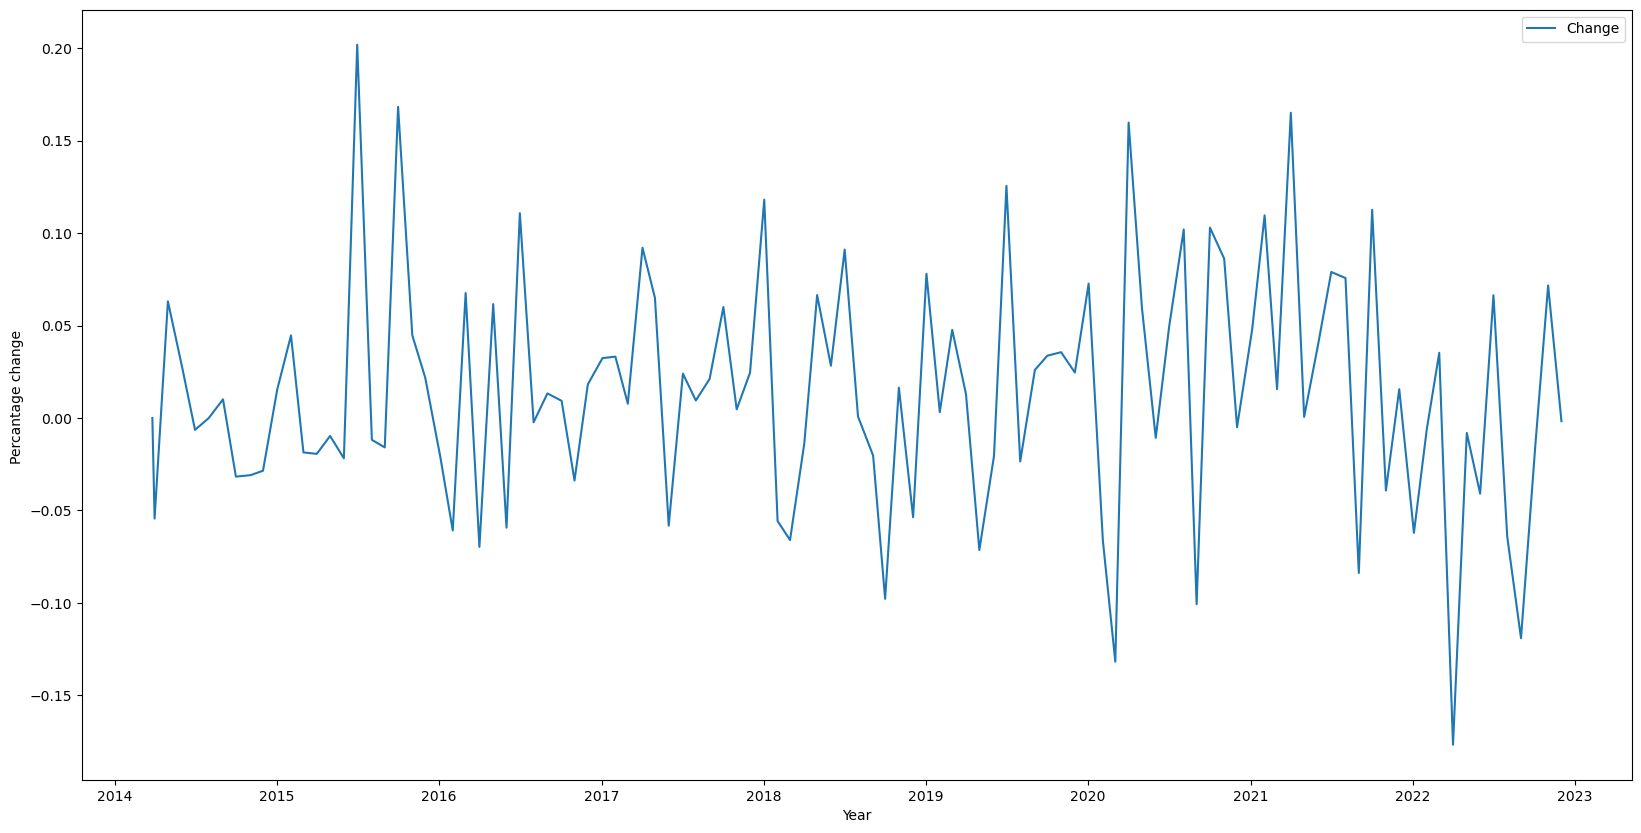

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(df['Month Starting'],df['Change %'],label='Change')
plt.xlabel('Year')
plt.ylabel('Percantage change ')
plt.legend()

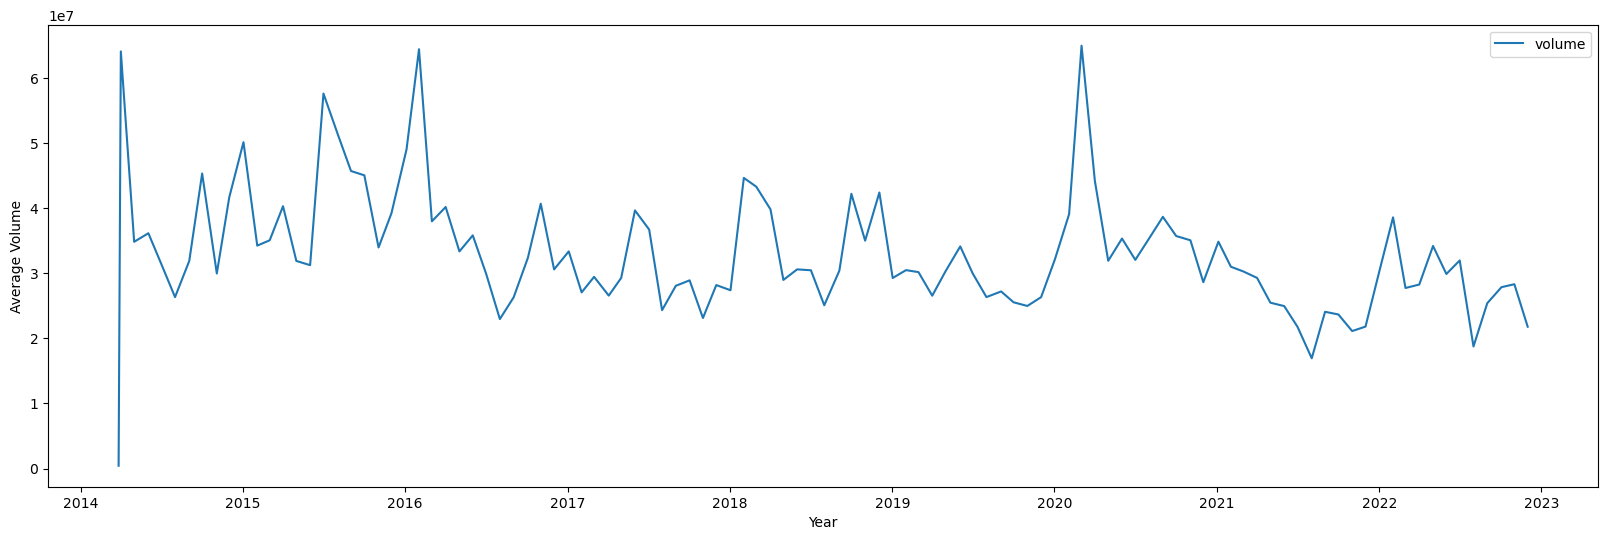

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(df['Month Starting'],df['Avg. Volume'],label='volume')
plt.xlabel('Year')
plt.ylabel('Average Volume')
plt.legend()

In [17]:
corr = df.corr()
corr

/tmp/ipykernel_20/2438084875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Open,High,Low,Close,Change %,Avg. Volume
Open,1.000000,0.996097,0.993130,0.988203,-0.097338,-0.372177
High,0.996097,1.000000,0.994040,0.994515,-0.031083,-0.362881
Low,0.993130,0.994040,1.000000,0.995412,-0.017648,-0.417914
Close,0.988203,0.994515,0.995412,1.000000,0.038501,-0.392309
Change %,-0.097338,-0.031083,-0.017648,0.038501,1.000000,-0.144140
Avg. Volume,-0.372177,-0.362881,-0.417914,-0.392309,-0.144140,1.000000


<Axes: >

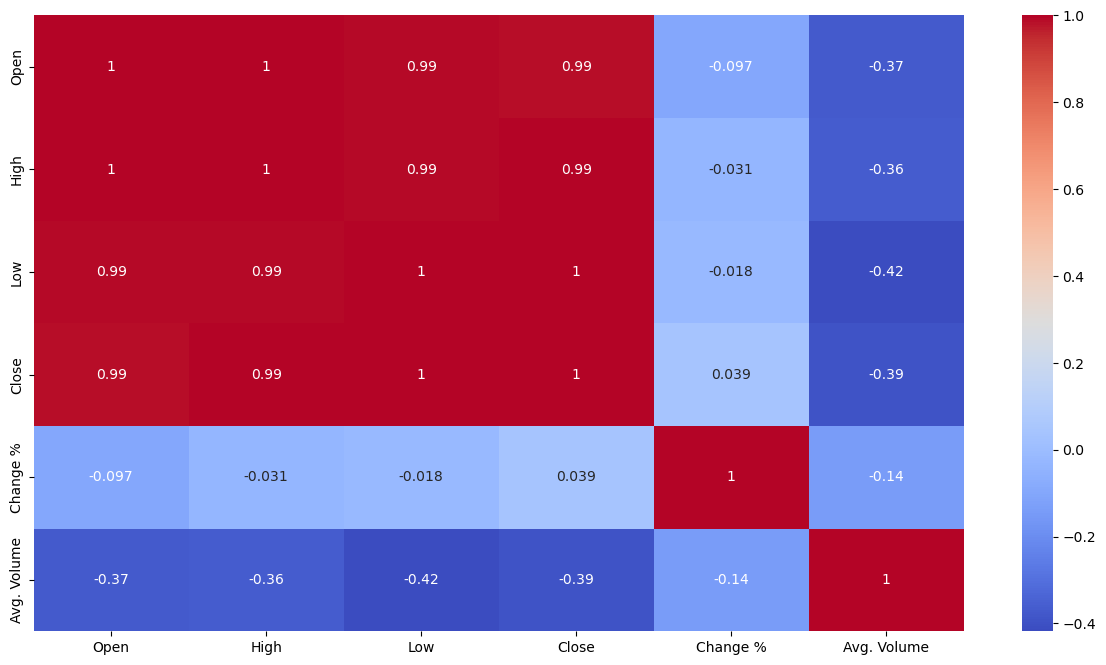

In [18]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [19]:
df['Returns'] = df['Close'].pct_change()
df

,Month Starting,Open,High,Low,Close,Change %,Avg. Volume,Returns
0,2022-12-01,101.38,102.59,100.67,101.28,-0.0017,21771536,NaN
1,2022-11-01,95.59,101.45,83.45,101.45,0.0717,28294944,0.001679
2,2022-10-03,97.22,105.10,91.90,94.66,-0.0155,27843110,-0.066930
3,2022-09-01,109.20,112.64,96.03,96.15,-0.1191,25381194,0.015741
4,2022-08-01,115.53,123.26,108.80,109.15,-0.0642,18737451,0.135205
...,...,...,...,...,...,...,...,...
101,2014-07-01,28.92,29.98,28.25,28.58,-0.0064,31411358,0.000000
102,2014-06-02,28.03,29.12,26.94,28.76,0.0275,36121936,0.006298
103,2014-05-01,26.35,28.39,25.16,27.99,0.0631,34808252,-0.026773
104,2014-04-01,27.93,30.24,25.14,26.33,-0.0544,64037909,-0.059307


In [20]:
df['Rolling Averages'] = df['Returns'].rolling(window=30).mean()
df

,Month Starting,Open,High,Low,Close,Change %,Avg. Volume,Returns,Rolling Averages
0,2022-12-01,101.38,102.59,100.67,101.28,-0.0017,21771536,NaN,NaN
1,2022-11-01,95.59,101.45,83.45,101.45,0.0717,28294944,0.001679,NaN
2,2022-10-03,97.22,105.10,91.90,94.66,-0.0155,27843110,-0.066930,NaN
3,2022-09-01,109.20,112.64,96.03,96.15,-0.1191,25381194,0.015741,NaN
4,2022-08-01,115.53,123.26,108.80,109.15,-0.0642,18737451,0.135205,NaN
...,...,...,...,...,...,...,...,...,...
101,2014-07-01,28.92,29.98,28.25,28.58,-0.0064,31411358,0.000000,-0.009427
102,2014-06-02,28.03,29.12,26.94,28.76,0.0275,36121936,0.006298,-0.008171
103,2014-05-01,26.35,28.39,25.16,27.99,0.0631,34808252,-0.026773,-0.008467
104,2014-04-01,27.93,30.24,25.14,26.33,-0.0544,64037909,-0.059307,-0.011614


In [21]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [22]:
df['Returns']=scale.fit_transform(df['Returns'].values.reshape(-1,1))
df

,Month Starting,Open,High,Low,Close,Change %,Avg. Volume,Returns,Rolling Averages
0,2022-12-01,101.38,102.59,100.67,101.28,-0.0017,21771536,NaN,NaN
1,2022-11-01,95.59,101.45,83.45,101.45,0.0717,28294944,0.185181,NaN
2,2022-10-03,97.22,105.10,91.90,94.66,-0.0155,27843110,-0.886997,NaN
3,2022-09-01,109.20,112.64,96.03,96.15,-0.1191,25381194,0.404936,NaN
4,2022-08-01,115.53,123.26,108.80,109.15,-0.0642,18737451,2.271883,NaN
...,...,...,...,...,...,...,...,...,...
101,2014-07-01,28.92,29.98,28.25,28.58,-0.0064,31411358,0.158949,-0.009427
102,2014-06-02,28.03,29.12,26.94,28.76,0.0275,36121936,0.257374,-0.008171
103,2014-05-01,26.35,28.39,25.16,27.99,0.0631,34808252,-0.259452,-0.008467
104,2014-04-01,27.93,30.24,25.14,26.33,-0.0544,64037909,-0.767874,-0.011614


In [23]:
mean_return = df['Returns'].mean()
mean_rolling = df['Rolling Averages'].mean()

In [24]:
df['Returns'] = df['Returns'].fillna(mean_return)
df['Rolling Averages'] = df['Rolling Averages'].fillna(mean_rolling)
df

,Month Starting,Open,High,Low,Close,Change %,Avg. Volume,Returns,Rolling Averages
0,2022-12-01,101.38,102.59,100.67,101.28,-0.0017,21771536,-2.960595e-17,-0.014608
1,2022-11-01,95.59,101.45,83.45,101.45,0.0717,28294944,1.851805e-01,-0.014608
2,2022-10-03,97.22,105.10,91.90,94.66,-0.0155,27843110,-8.869972e-01,-0.014608
3,2022-09-01,109.20,112.64,96.03,96.15,-0.1191,25381194,4.049361e-01,-0.014608
4,2022-08-01,115.53,123.26,108.80,109.15,-0.0642,18737451,2.271883e+00,-0.014608
...,...,...,...,...,...,...,...,...,...
101,2014-07-01,28.92,29.98,28.25,28.58,-0.0064,31411358,1.589494e-01,-0.009427
102,2014-06-02,28.03,29.12,26.94,28.76,0.0275,36121936,2.573736e-01,-0.008171
103,2014-05-01,26.35,28.39,25.16,27.99,0.0631,34808252,-2.594525e-01,-0.008467
104,2014-04-01,27.93,30.24,25.14,26.33,-0.0544,64037909,-7.678739e-01,-0.011614


In [25]:
df.isnull().sum()

Month Starting      0
Open                0
High                0
Low                 0
Close               0
Change %            0
Avg. Volume         0
Returns             0
Rolling Averages    0
dtype: int64

In [26]:
from sklearn.ensemble import IsolationForest
model = IsolationForest()
model.fit(df[['Returns']])

IsolationForest()

In [27]:
df['Analomies'] = model.predict(df[['Returns']])
df['Analomies']  = df['Analomies'].map({1:0,-1:1})

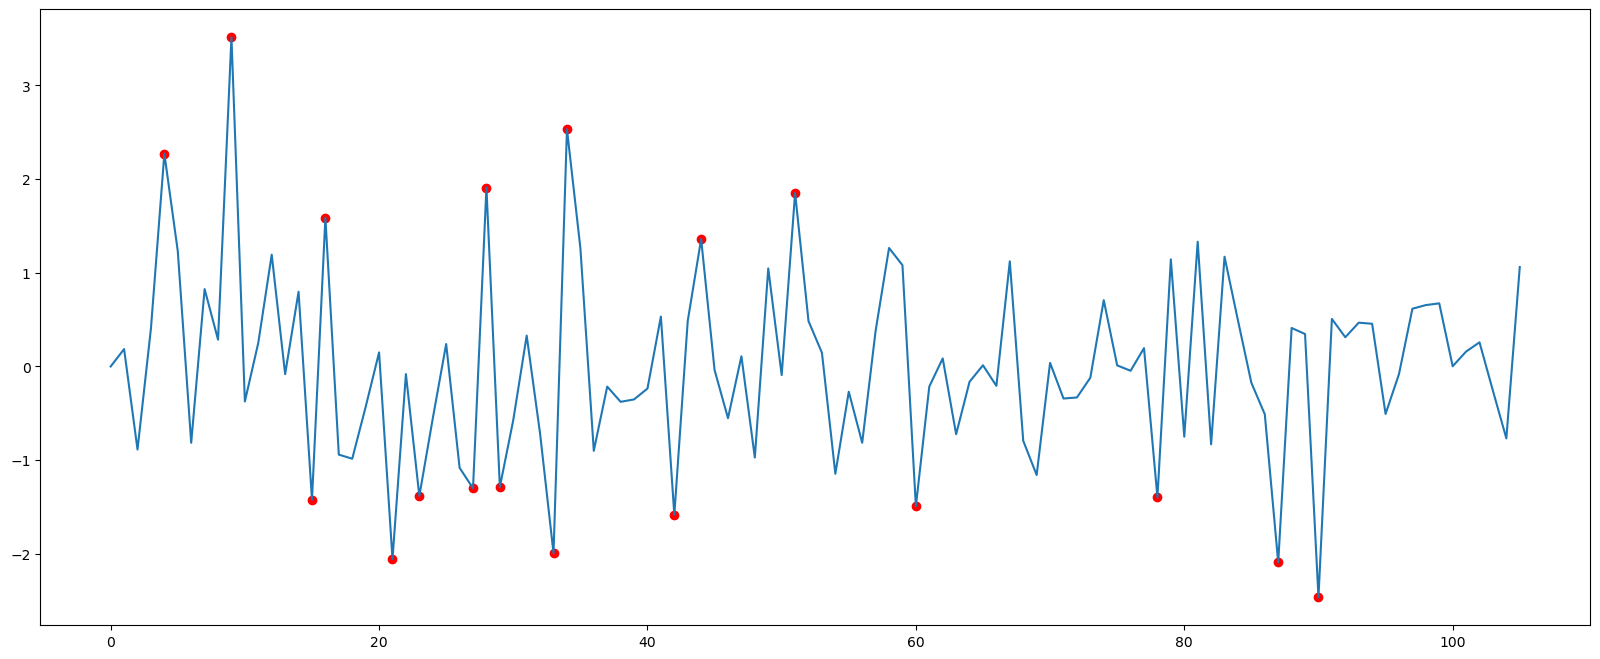

In [28]:
plt.figure(figsize=(20,8))
plt.plot(df.index,df['Returns'],label='Returns')
plt.scatter(df[df['Analomies'] == 1].index,df[df['Analomies'] == 1]['Returns'],color='red')
plt.show()